# MS-COCO Analysis

In [1]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab

### Loading the dataset

In [3]:
dataType='val2017'
annFile='coco/annotations/instances_{}.json'.format(dataType)
coco=COCO(annFile)

loading annotations into memory...
Done (t=0.23s)
creating index...
index created!


### Number of Images, Categories and Super Categories

In [ ]:
imgids = coco.getImgIds()
print(f"Number of images: {len(imgids)}")

categories = coco.loadCats(coco.getCatIds())
print(f"Number of categories: {len(categories)}")

super_categories = set([cat['supercategory'] for cat in categories])
print(f"Number of super categories: {len(super_categories)}")

Number of images: 5000
Number of categories: 80
Number of super categories: 12


### Min, Max, Mean and Standard Deviation of number of categories per image

In [ ]:
dict_img ={}
for imgid in imgids:
    dict_img[imgid] = {}
    annids = coco.getAnnIds(imgIds=imgid)
    anns = coco.loadAnns(annids)
    for ann in anns:
        cat = ann['category_id']
        if cat not in dict_img[imgid]:
            dict_img[imgid][cat] = 1
        else:
            dict_img[imgid][cat] += 1

mean_length = np.mean([len(dict_img[imgid]) for imgid in imgids])
max_length = np.max([len(dict_img[imgid]) for imgid in imgids])
min_length = np.min([len(dict_img[imgid]) for imgid in imgids])
standard_deviation = np.std([len(dict_img[imgid]) for imgid in imgids])

print(f"Max number of categories per image: {max_length}")
print(f"Min number of categories per image: {min_length}")
print(f"Mean number of categories per image: {mean_length}")
print(f"Standard deviation of number of categories per image: {standard_deviation}")


Max number of categories per image: 14
Min number of categories per image: 0
Mean number of categories per image: 2.9262
Standard deviation of number of categories per image: 1.8878436269988041


### Min, Max, Mean and Standard Deviation of number of elements per image

In [76]:
elem_img = [sum(dict_img[imgid].values()) for imgid in imgids]

print(f"Max number of elements per image: {np.max(elem_img)}")
print(f"Min number of elements per image: {np.min(elem_img)}")
print(f"Mean number of elements per image: {np.mean(elem_img)}")
print(f"Standard deviation of number of elements per image: {np.std(elem_img)}")

Max number of elements per image: 63
Min number of elements per image: 0
Mean number of elements per image: 7.3562
Standard deviation of number of elements per image: 7.438233766157125


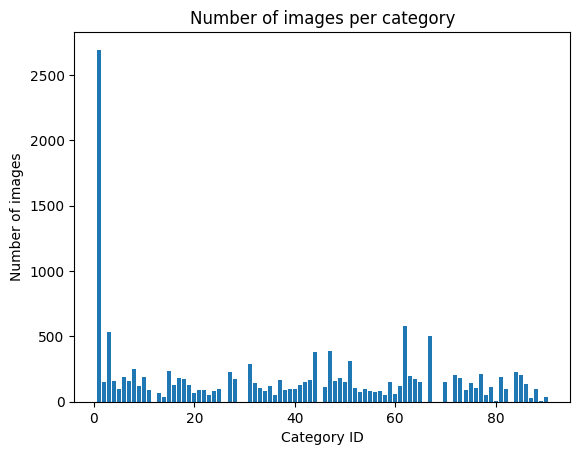

In [ ]:
cats = coco.loadCats(coco.getCatIds())
id_cats = [cat['id'] for cat in cats]

image_count_per_cat = []
for id_cat in id_cats:
    imgids = coco.getImgIds(catIds=id_cat)
    image_count_per_cat.append(len(imgids))

plt.bar(id_cats, image_count_per_cat)
plt.title('Number of images per category')
plt.xlabel('Category ID')
plt.ylabel('Number of images')
plt.show()


In [ ]:
cats = coco.loadCats(coco.getCatIds())
id_cats = [cat['id'] for cat in cats]

image_count_per_cat = []
for id_cat in id_cats:
    imgids = coco.getImgIds(catIds=id_cat)
    image_count_per_cat.append(len(imgids))

plt.bar(id_cats, image_count_per_cat)
plt.title('Number of images per category')
plt.xlabel('Category ID')
plt.ylabel('Number of images')
plt.show()


In [35]:
for imgid in imgids[:1]:
    annids = coco.getAnnIds(imgIds=imgid)
    anns = coco.loadAnns(annids)
    # print(anns[6]["image_id"])
    # print(anns[0])
    # print(anns[1])
    for ann in anns:
        print(ann["image_id"], ann["category_id"])
    print(f"Image {imgid} has {len(anns)} annotations") 
    

397133 44
397133 67
397133 1
397133 49
397133 51
397133 51
397133 79
397133 1
397133 47
397133 47
397133 51
397133 51
397133 56
397133 50
397133 56
397133 56
397133 79
397133 57
397133 81
Image 397133 has 19 annotations


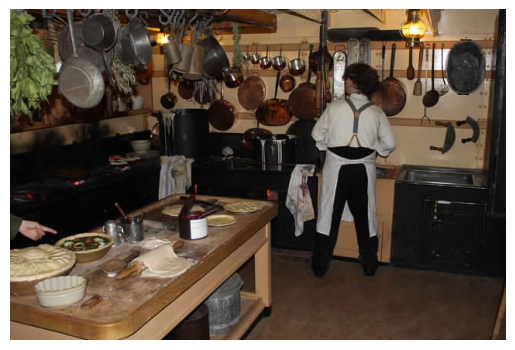

In [32]:
img = coco.loadImgs(397133)[0]
I = io.imread(img['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.show()